In [1]:
import pandas as pd
ds=pd.read_csv(r"D:\liver_cancer_prediction.csv")
ds.head(5)

,Country,Region,Population,Incidence_Rate,Mortality_Rate,Gender,Age,Alcohol_Consumption,Smoking_Status,Hepatitis_B_Status,...,Herbal_Medicine_Use,Healthcare_Access,Screening_Availability,Treatment_Availability,Liver_Transplant_Access,Ethnicity,Preventive_Care,Survival_Rate,Cost_of_Treatment,Prediction
0,Nigeria,Sub-Saharan Africa,340672131,15.381360,6.160480,Male,81,Low,Smoker,Negative,...,No,Poor,Available,Available,No,Hispanic,Good,17.724793,47486.167423,Yes
1,United Kingdom,Europe,1054632817,3.306101,14.392985,Male,87,Low,Smoker,Negative,...,Yes,Good,Available,Not Available,No,Mixed,Moderate,19.558853,13782.265151,No
2,India,South Asia,751241440,9.325053,12.777878,Male,34,Moderate,Smoker,Negative,...,No,Good,Not Available,Not Available,No,Mixed,Moderate,68.468892,25308.034132,No
3,Colombia,South America,1167333367,9.399658,8.634609,Male,63,Low,Non-Smoker,Positive,...,No,Good,Not Available,Not Available,Yes,Hispanic,Moderate,18.200287,38221.622202,No
4,Iran,Middle East,1082070787,9.665663,12.422518,Male,85,High,Non-Smoker,Positive,...,Yes,Moderate,Available,Available,Yes,Mixed,Moderate,45.019153,26765.301404,No


In [2]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160292 entries, 0 to 160291
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  160292 non-null  object 
 1   Region                   160292 non-null  object 
 2   Population               160292 non-null  int64  
 3   Incidence_Rate           160292 non-null  float64
 4   Mortality_Rate           160292 non-null  float64
 5   Gender                   160292 non-null  object 
 6   Age                      160292 non-null  int64  
 7   Alcohol_Consumption      160292 non-null  object 
 8   Smoking_Status           160292 non-null  object 
 9   Hepatitis_B_Status       160292 non-null  object 
 10  Hepatitis_C_Status       160292 non-null  object 
 11  Obesity                  160292 non-null  object 
 12  Diabetes                 160292 non-null  object 
 13  Rural_or_Urban           160292 non-null  object 
 14  Seaf

In [3]:
ds.describe()

,Population,Incidence_Rate,Mortality_Rate,Age,Survival_Rate,Cost_of_Treatment
count,1.602920e+05,160292.000000,160292.000000,160292.000000,160292.000000,160292.000000
mean,7.527321e+08,18.523468,15.525234,54.640088,49.957811,25275.608904
std,4.328283e+08,9.513400,8.376871,20.188217,23.036437,14307.105453
min,1.011968e+06,2.000035,1.000080,20.000000,10.000548,500.397303
25%,3.772400e+08,10.319582,8.286968,37.000000,30.129577,12858.138774
50%,7.548388e+08,18.529822,15.565488,55.000000,49.858143,25349.819261
75%,1.126721e+09,26.751354,22.808666,72.000000,69.833652,37672.515875
max,1.499993e+09,34.999952,29.999829,89.000000,89.998005,49999.791824


In [9]:
ds.shape[2:3]

()

In [13]:
ds.columns[:3]

Index(['Country', 'Region', 'Population'], dtype='object')

In [14]:
ds.isnull().sum()

Country                    0
Region                     0
Population                 0
Incidence_Rate             0
Mortality_Rate             0
Gender                     0
Age                        0
Alcohol_Consumption        0
Smoking_Status             0
Hepatitis_B_Status         0
Hepatitis_C_Status         0
Obesity                    0
Diabetes                   0
Rural_or_Urban             0
Seafood_Consumption        0
Herbal_Medicine_Use        0
Healthcare_Access          0
Screening_Availability     0
Treatment_Availability     0
Liver_Transplant_Access    0
Ethnicity                  0
Preventive_Care            0
Survival_Rate              0
Cost_of_Treatment          0
Prediction                 0
dtype: int64

In [16]:
ds.duplicated().sum()

0

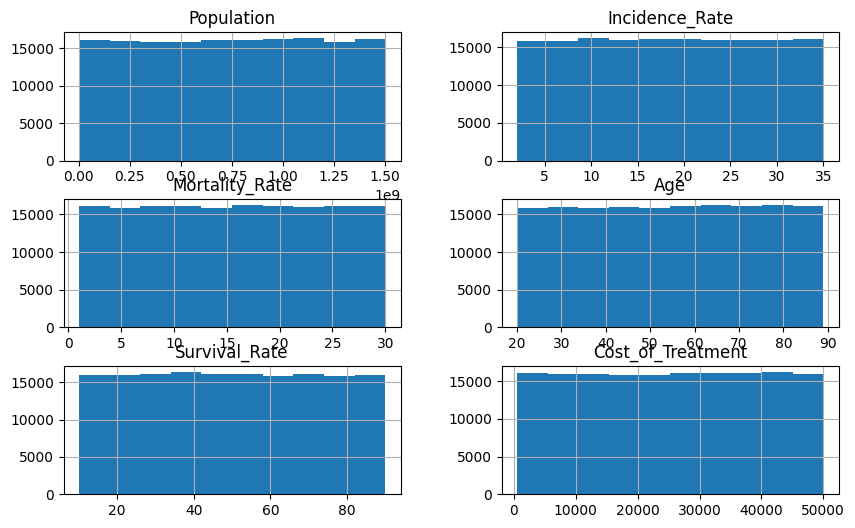

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
ds.hist(figsize=(10,6))
plt.show()

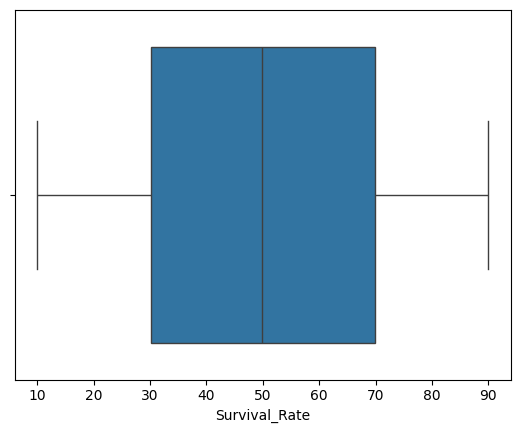

In [22]:
sns.boxplot(x=ds["Survival_Rate"])
plt.show()

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(ds.corr(),annot=True,cmap="Survival_Rate")
plt.show()

ValueError: could not convert string to float: 'Nigeria'

<Figure size 800x600 with 0 Axes>

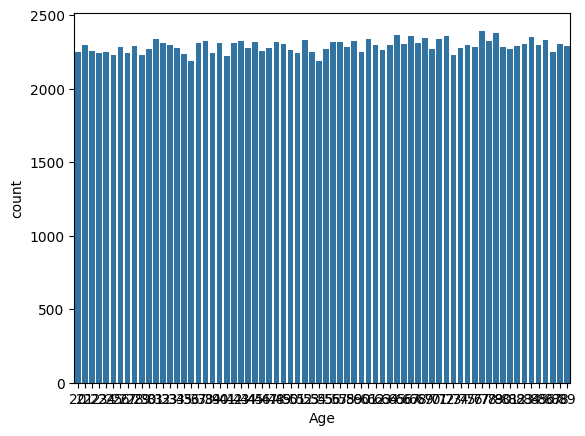

In [29]:
import pandas as pd
ds=pd.read_csv(r"D:\liver_cancer_prediction.csv")
sns.countplot(x='Age', data=ds)
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import linear_model
scale = StandardScaler()  # or MinMaxScaler()
# ds[['Incidence_Rate', 'Age']] = scaler.fit_transform(ds[['Incidence_Rate', 'Age']])
X = ds[['Incidence_Rate', 'Age']]
y = ds['Survival_Rate']

scaledX = scale.fit_transform(X)
reg=linear_model.LinearRegression()
reg.fit(scaledX,y)
scaled = scale.transform([[15.381360, 81]])
predictedSurvival_Rate = reg.predict([scaled[0]])
print(predictedSurvival_Rate)

[-0.11160495]


C:\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
